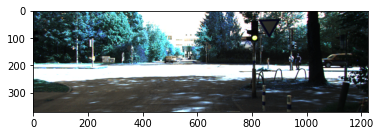

In [9]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
img=cv2.imread('adaptive_hist_data/0000000000.png')
#cv2.imshow("Original",img)
plt.imshow(img)
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
height,width=img.shape


In [14]:
def create_histogram(img):
    hist=np.zeros(256)
    for i in range(height):
        for j in range(width):
            hist[img[i][j]]+=1
    return hist

def create_cumulative_histogram(hist):
    cum_hist=np.zeros(256)
    cum_hist[0]=hist[0]
    for i in range(1,256):
        cum_hist[i]=hist[i]+cum_hist[i-1]
    return cum_hist

def show_histogram(img):
  fig,ax = plt.subplots(1,2,figsize=(15,5))
  ax[0].imshow(img,cmap="gray")
  ax[0].axis('off')
  ax[0].set_title("Image")

  ax[1].hist(img.ravel(), bins=40, range=(0.0, 256.0), ec='k') #calculating histogram
  ax[1].set_title("Histogram")
  ax[1].set_xlabel("range")
  plt.show()
def show_equalized_histogram(img_eq):
    

    fig,ax = plt.subplots(1,2,figsize=(15,5))
    ax[0].imshow(img_eq,cmap="gray")
    ax[0].axis('off')
    ax[0].set_title("Image")
    ax[1].hist(img_eq.ravel(), bins=40, range=(0.0, 256.0), ec='k') #calculating histogram
    ax[1].set_title("Histogram")
    ax[1].set_xlabel("range")
    plt.show()


def show_equalized_image_with_histogram(img_eq):
    img_eq=np.asarray(img_eq,dtype=np.uint8)
    img_eq=cv2.flip(img_eq,0)
    plt.hist(img_eq.flatten(), bins=40, range=(0.0, 256.0), ec='k') #calculating histogram
    plt.gca().invert_xaxis()
    plt.show()
   

def create_equalized_image(img,cum_hist):
    img_eq=np.zeros(img.shape)
    for i in range(height):
        for j in range(width):
            img_eq[i][j]=cum_hist[img[i][j]]
    return img_eq

def show_equalized_image(img_eq):
    plt.imshow(img_eq,cmap="gray")

    plt.show()


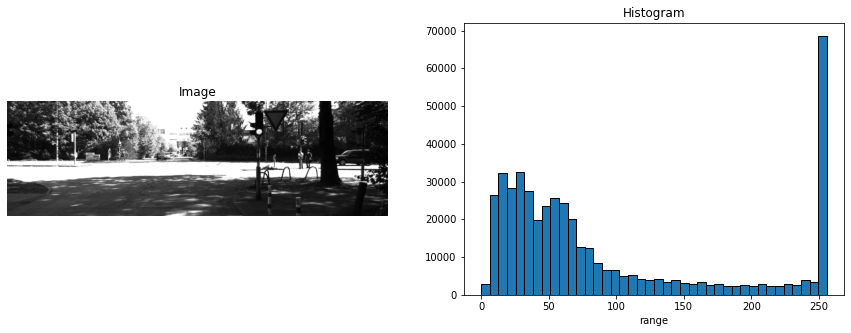

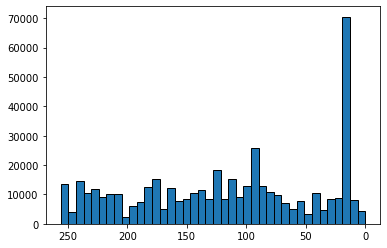

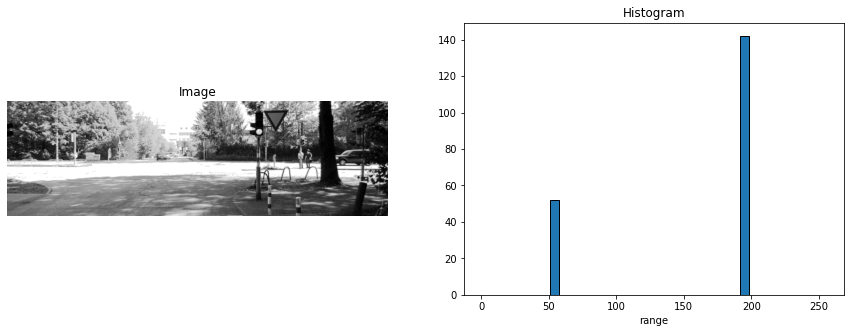

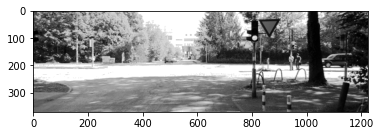

In [15]:
show_histogram(img)
fin=create_equalized_image(img,create_cumulative_histogram(create_histogram(img)))
show_equalized_image_with_histogram(fin)
show_equalized_histogram(fin)
show_equalized_image(fin)